In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

import requests
from lxml import html

import scipy.interpolate as interp

plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (8,6)

import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcm')
mpl.rcParams['axes.prop_cycle'] = cycler('color', \
                                         ['#1f77b4', '#ff7f0e', '#2ca02c', \
                                          '#d62728', '#9467bd', \
                                          (0.2,0.8,1.), '#bcbd22', '#17becf'])

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', \
                '#d62728', '#9467bd', \
                (0.2,0.8,1.), '#bcbd22', '#17becf']


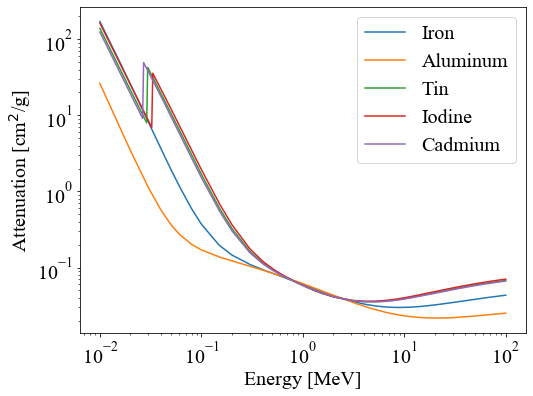

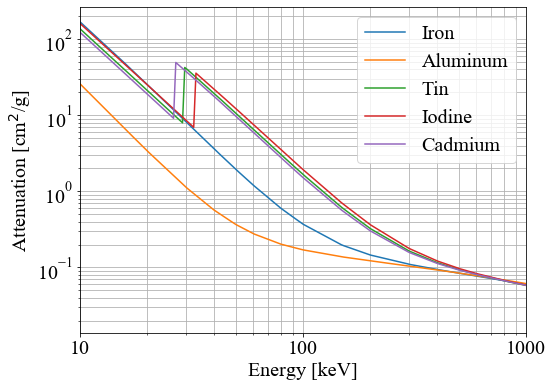

In [50]:
from scipy.interpolate import interp1d

# Grabs the attenuation data and returns a function that interpolates it in the log-log space
def AttenuationFromTxt( input_file ):
    data = np.genfromtxt(input_file, skip_header=2)
    log_interp = interp1d( np.log10(data[:,0]), np.log10(data[:,1]) )
    func = lambda x: np.power(10.0, log_interp(np.log10(x)))
    return func


iron = np.genfromtxt('iron_attenuation.csv', skip_header=2)
alum = np.genfromtxt('al_attenuation.csv',skip_header=2)
tin = np.genfromtxt('tin_attenuation.csv',skip_header=2)
iodine = np.genfromtxt('iodine_attenuation.csv',skip_header=2)
cd = np.genfromtxt('cd_attenuation.csv',skip_header=2)

iron = AttenuationFromTxt( 'iron_attenuation.csv' )
alum = AttenuationFromTxt( 'al_attenuation.csv' )
tin = AttenuationFromTxt( 'tin_attenuation.csv' )
iodine = AttenuationFromTxt( 'iodine_attenuation.csv' )
cd = AttenuationFromTxt( 'cd_attenuation.csv' )

E = np.logspace(-2.,2.,400)

plt.figure(1)
plt.plot( E, iron(E), label='Iron')
plt.plot( E, alum(E), label='Aluminum')
plt.plot( E, tin(E), label='Tin')
plt.plot( E, iodine(E), label='Iodine')
plt.plot( E, cd(E), label='Cadmium')
plt.legend()
plt.xlabel('Energy [MeV]')
plt.ylabel('Attenuation [cm$^2$/g]')
plt.xscale('log')
plt.yscale('log')

plt.figure(2)
plt.plot( E, iron(E), label='Iron')
plt.plot( E, alum(E), label='Aluminum')
plt.plot( E, tin(E), label='Tin')
plt.plot( E, iodine(E), label='Iodine')
plt.plot( E, cd(E), label='Cadmium')
plt.legend()
plt.xlabel('Energy [keV]')
plt.ylabel('Attenuation [cm$^2$/g]')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01,1.)
plt.xticks([0.01,0.1,1.],['10','100','1000'])
plt.grid(which='both')






Text(0.5, 1.0, '2mm stainless sheet')

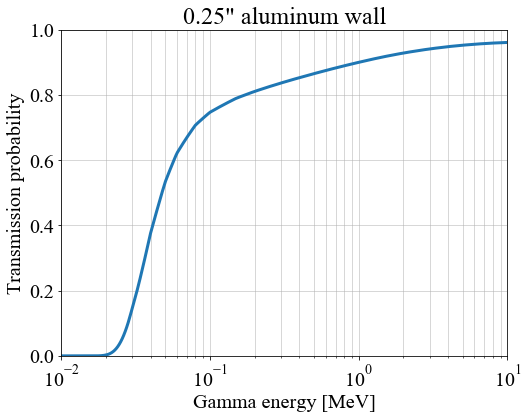

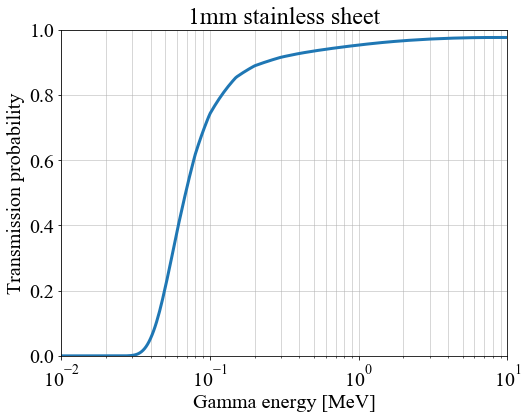

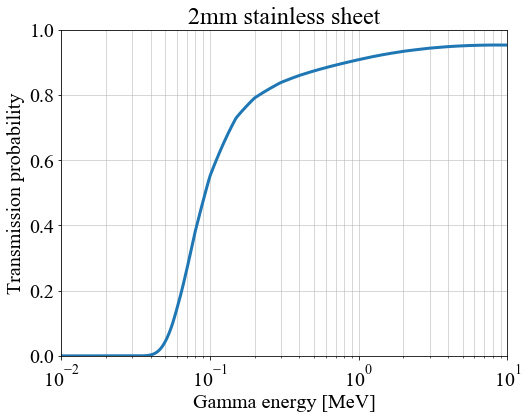

In [52]:
dens_al = 2.7 # g/cm^3
dens_stainless = 8.03 # g/cm^3

### Compute transmission probability for 0.25" thick aluminum
plt.figure(1)
al_atten = 1. / (dens_al * alum(E))
dist = 0.25 * 2.54
transmission_prob = np.exp( -dist / al_atten )
plt.plot( E, transmission_prob, linewidth=3)
plt.xscale('log')
#plt.yscale('log')
plt.ylim(0.,1.)
plt.xlim(1.e-2, 10.)
plt.grid(which='both',linewidth=0.5)
plt.ylabel('Transmission probability')
plt.xlabel('Gamma energy [MeV]')
plt.title('0.25\" aluminum wall')



### Compute transmission probability for 1mm and 2mm thick stainless steel
plt.figure(2)
ss_atten = 1. / (dens_stainless * iron(E))
dist = 0.1
transmission_prob = np.exp( -dist / ss_atten )
plt.plot( E, transmission_prob, linewidth=3)
plt.xscale('log')
#plt.yscale('log')
plt.ylim(0.,1.)
plt.xlim(1.e-2, 10.)
plt.grid(which='both',linewidth=0.5)
plt.ylabel('Transmission probability')
plt.xlabel('Gamma energy [MeV]')
plt.title('1mm stainless sheet')


plt.figure(3)
ss_atten = 1. / (dens_stainless * iron(E))
dist = 0.2
transmission_prob = np.exp( -dist / ss_atten )
plt.plot( E, transmission_prob, linewidth=3)
plt.xscale('log')
#plt.yscale('log')
plt.ylim(0.,1.)
plt.xlim(1.e-2, 10.)
plt.grid(which='both',linewidth=0.5)
plt.ylabel('Transmission probability')
plt.xlabel('Gamma energy [MeV]')
plt.title('2mm stainless sheet')






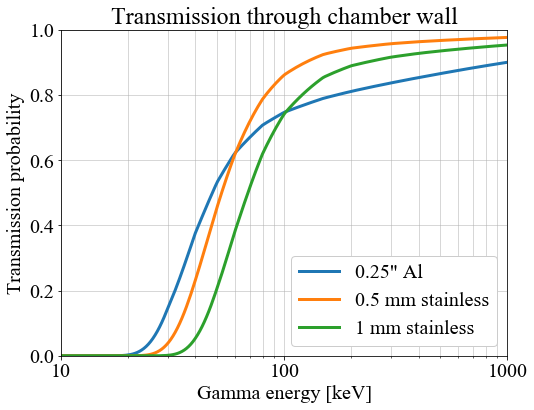

In [53]:
dens_al = 2.7 # g/cm^3
dens_stainless = 8.03 # g/cm^3

### Compute transmission probability for 0.25" thick aluminum
al_atten = 1. / (dens_al * alum(E))
dist = 0.25 * 2.54
transmission_prob = np.exp( -dist / al_atten )
plt.plot( E, transmission_prob, \
         linewidth=3, label='0.25\" Al')
plt.xscale('log')
#plt.yscale('log')
plt.ylim(0.,1.)
plt.xlim(1.e-2, 10.)
plt.grid(which='both',linewidth=0.5)
plt.ylabel('Transmission probability')
plt.xlabel('Gamma energy [MeV]')



### Compute transmission probability for 1mm and 2mm thick stainless steel
ss_atten = 1. / (dens_stainless * iron(E))
dist = 0.05
transmission_prob = np.exp( -dist / ss_atten )
plt.plot( E, transmission_prob, \
         linewidth=3, label='0.5 mm stainless')
plt.xscale('log')
#plt.yscale('log')
plt.ylim(0.,1.)
plt.xlim(1.e-2, 10.)
plt.grid(which='both',linewidth=0.5)
plt.ylabel('Transmission probability')
plt.xlabel('Gamma energy [MeV]')



ss_atten = 1. / (dens_stainless * iron(E))
dist = 0.1
transmission_prob = np.exp( -dist / ss_atten )
plt.plot( E, transmission_prob, \
         linewidth=3, label='1 mm stainless')
plt.xscale('log')
#plt.yscale('log')
plt.ylim(0.,1.)
plt.xlim(1.e-2, 1.)
plt.grid(which='both',linewidth=0.5)
plt.ylabel('Transmission probability')
plt.xlabel('Gamma energy [keV]')
plt.xticks([0.01,0.1,1.],['10','100','1000'])
#plt.xticklabels(['0.01','0.1','1','10'])
plt.legend( framealpha=1. )

plt.title('Transmission through chamber wall')

plt.savefig('transmission_through_chamber_wall.png',dpi=200,bbox_inches='tight')

# Comparing attenuators

(0.001, 1.0)

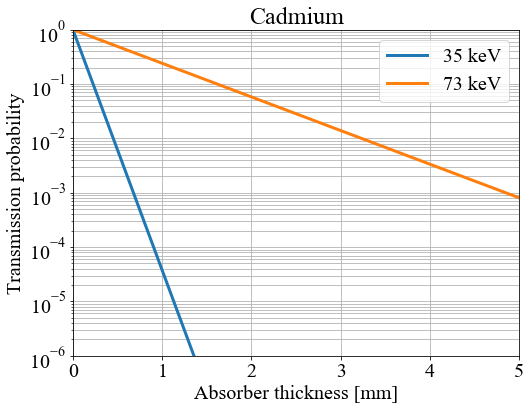

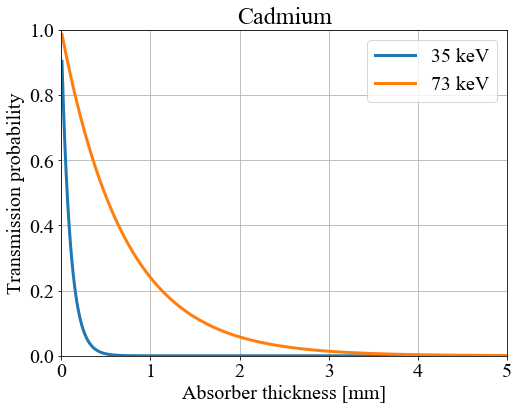

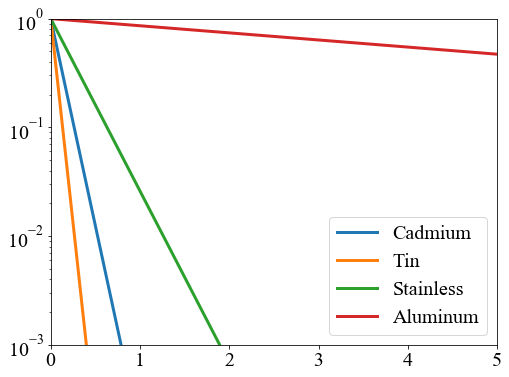

In [74]:
dens_cd = 4.047 # g/cm^3
dens_tin = 7.31 # g/cm^3
dens_al = 2.7 # g/cm^3
dens_stainless = 8.03 # g/cm^3


xray_E = 0.035 # MeV
gray_E = 0.073 # MeV

cd_xray_att = 1./(dens_cd * cd(xray_E))
cd_gray_att = 1./(dens_cd * cd(gray_E))

tin_xray_att = 1./(dens_tin * tin(xray_E))
tin_gray_att = 1./(dens_tin * tin(gray_E))

al_xray_att = 1./(dens_al * alum(xray_E))
al_gray_att = 1./(dens_al * alum(gray_E))

ss_xray_att = 1./(dens_stainless * iron(xray_E))
ss_gray_att = 1./(dens_stainless * iron(gray_E))


thickness = np.linspace(0.01,1,100)
thickness = np.logspace(-3,0,300)

cd_xray_trans = np.exp( -thickness/cd_xray_att )
cd_gray_trans = np.exp( -thickness/cd_gray_att )

tin_xray_trans = np.exp( -thickness/tin_xray_att )
tin_gray_trans = np.exp( -thickness/tin_gray_att )

al_xray_trans = np.exp( -thickness/al_xray_att )
al_gray_trans = np.exp( -thickness/al_gray_att )

ss_xray_trans = np.exp( -thickness/ss_xray_att )
ss_gray_trans = np.exp( -thickness/ss_gray_att )


plt.figure(1)
plt.plot( thickness*10, cd_xray_trans, linewidth=3, label='35 keV')
plt.plot(thickness*10, cd_gray_trans, linewidth=3, label='73 keV')
plt.yscale('log')
plt.xlim(0.,5)
plt.ylim(1.e-6,1.)
plt.xlabel('Absorber thickness [mm]')
plt.ylabel('Transmission probability')
plt.legend()
plt.title('Cadmium')
plt.grid(which='both')

plt.figure(2)
plt.plot( thickness*10, cd_xray_trans, linewidth=3, label='35 keV')
plt.plot(thickness*10, cd_gray_trans, linewidth=3, label='73 keV')
plt.xlim(0.,5)
plt.ylim(0.,1.)
plt.xlabel('Absorber thickness [mm]')
plt.ylabel('Transmission probability')
plt.legend()
plt.title('Cadmium')
plt.grid(which='both')


ratio_cd = np.exp(-thickness/cd_xray_att) / np.exp(-thickness/cd_gray_att)
ratio_tin = np.exp(-thickness/tin_xray_att) / np.exp(-thickness/tin_gray_att)
ratio_ss = np.exp(-thickness/ss_xray_att) / np.exp(-thickness/ss_gray_att)
ratio_al = np.exp(-thickness/al_xray_att) / np.exp(-thickness/al_gray_att)


plt.figure(3)
plt.plot( thickness*10, ratio_cd, linewidth=3., label='Cadmium' )
plt.plot( thickness*10, ratio_tin, linewidth=3., label='Tin' )
plt.plot( thickness*10, ratio_ss, linewidth=3., label='Stainless' )
plt.plot( thickness*10, ratio_al, linewidth=3., label='Aluminum' )
plt.legend()
plt.xlim(0.,5)
plt.yscale('log')
plt.ylim(0.001,1.)




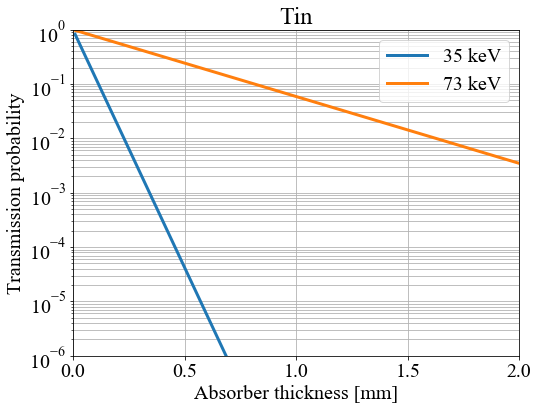

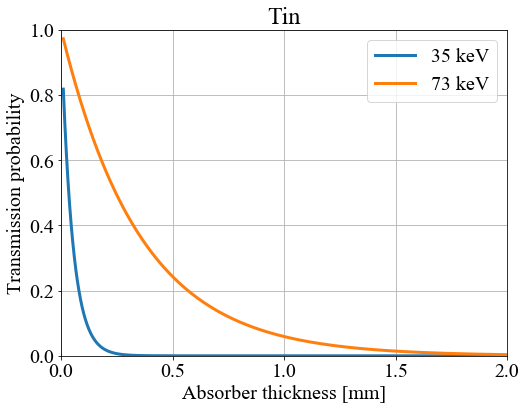

In [72]:
plt.figure(1)
plt.plot( thickness*10, tin_xray_trans, linewidth=3, label='35 keV')
plt.plot(thickness*10, tin_gray_trans, linewidth=3, label='73 keV')
plt.yscale('log')
plt.xlim(0.,2)
plt.ylim(1.e-6,1.)
plt.xlabel('Absorber thickness [mm]')
plt.ylabel('Transmission probability')
plt.legend()
plt.title('Tin')
plt.grid(which='both')

plt.figure(2)
plt.plot( thickness*10, tin_xray_trans, linewidth=3, label='35 keV')
plt.plot(thickness*10, tin_gray_trans, linewidth=3, label='73 keV')
plt.xlim(0.,2)
plt.ylim(0.,1.)
plt.xlabel('Absorber thickness [mm]')
plt.ylabel('Transmission probability')
plt.legend()
plt.title('Tin')
plt.grid(which='both')
